In [62]:
# Download dataset: Seoul Bike Sharing Demand
# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand
%pip install ucimlrepo

# import
import matplotlib.pyplot as plt
import pandas as pd
from ucimlrepo import fetch_ucirepo
import seaborn as sns
import numpy as np

Note: you may need to restart the kernel to use updated packages.


In [63]:
# Import data, show metadata

# https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

seoul_bike_sharing_demand = fetch_ucirepo(id=560)
# print(seoul_bike_sharing_demand)

# metadata
print(seoul_bike_sharing_demand.metadata)

# variable information
print(seoul_bike_sharing_demand.variables)


{'uci_id': 560, 'name': 'Seoul Bike Sharing Demand', 'repository_url': 'https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand', 'data_url': 'https://archive.ics.uci.edu/static/public/560/data.csv', 'abstract': 'The dataset contains count of public bicycles rented per hour in the Seoul Bike Sharing System, with corresponding weather data and holiday information', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 8760, 'num_features': 13, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Functioning Day'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Mon Feb 05 2024', 'dataset_doi': '10.24432/C5F62R', 'creators': [], 'intro_paper': None, 'additional_info': {'summary': 'Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and a

In [64]:
# data (as pandas dataframes)
X = seoul_bike_sharing_demand.data.features
Y = seoul_bike_sharing_demand.data.targets

# print(X)
# print(y)


# Nulls. Zero nulls
# print(X.isnull().sum())
# print(y.isnull().sum())

X


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday
0,1/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,1/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
2,1/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday
3,1/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
4,1/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday


In [65]:
Y

,Functioning Day
0,Yes
1,Yes
2,Yes
3,Yes
4,Yes
...,...
8755,Yes
8756,Yes
8757,Yes
8758,Yes


In [66]:
data = X.join(Y)
data["Date"] = pd.to_datetime(data["Date"], dayfirst=True)
data


,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [67]:
Y_features_names = ["Rented Bike Count"]
Y = data[Y_features_names]
X = data.drop(Y_features_names, axis=1)
X

,Date,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# 1. Глубокий анализ временных рядов
## 1.1 Агрегация по периодам времени

In [68]:
def group_by_date(df, resample="D"):
    return df.set_index(["Date"]).resample(resample)


# day
gr = group_by_date(data, resample="D")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

,Mean,Sum
Date,,
2017-12-01,397.458333,9539
2017-12-02,355.125000,8523
2017-12-03,300.916667,7222
2017-12-04,363.708333,8729
2017-12-05,346.125000,8307
...,...,...
2018-11-26,715.083333,17162
2018-11-27,678.416667,16282
2018-11-28,688.500000,16524


In [69]:
# week
gr = group_by_date(data, resample="W-Mon")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

,Mean,Sum
Date,,
2017-12-04,354.302083,34013
2017-12-11,286.255952,48091
2017-12-18,215.113095,36139
2017-12-25,204.904762,34424
2018-01-01,219.958333,36953
2018-01-08,249.898810,41983
2018-01-15,189.589286,31851
2018-01-22,249.428571,41904
2018-01-29,135.642857,22788


In [70]:
# month
gr = group_by_date(data, resample="M")["Rented Bike Count"]
pd.DataFrame({"Mean": gr.mean(), "Sum": gr.sum()})

/tmp/ipykernel_70689/2662111961.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.set_index(["Date"]).resample(resample)


,Mean,Sum
Date,,
2017-12-31,249.099462,185330
2018-01-31,201.620968,150006
2018-02-28,225.941964,151833
2018-03-31,511.551075,380594
2018-04-30,728.093056,524227
2018-05-31,950.387097,707088
2018-06-30,1245.676389,896887
2018-07-31,987.177419,734460
2018-08-31,876.192204,651887


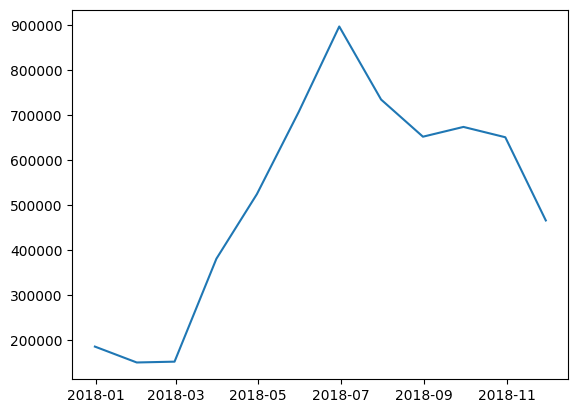

In [71]:
plt.plot(gr.sum())

<BarContainer object of 7 artists>

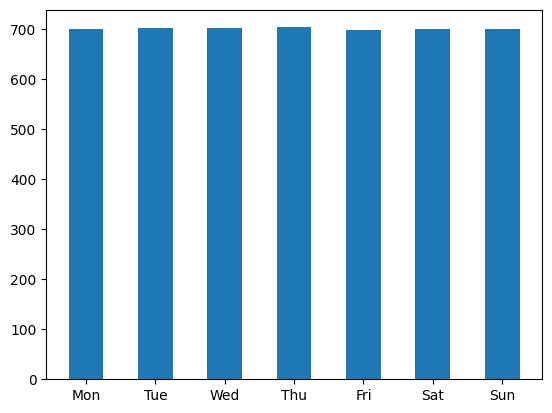

In [72]:
week_days = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
values_in_week_days = []
for d in week_days:
    gr = group_by_date(data, resample=f"W-{d[:3]}")["Rented Bike Count"]
    values_in_week_days.append(gr.mean().mean())
plt.bar(week_days, values_in_week_days, width=0.5)

## 1.2 Сезонные закономерности

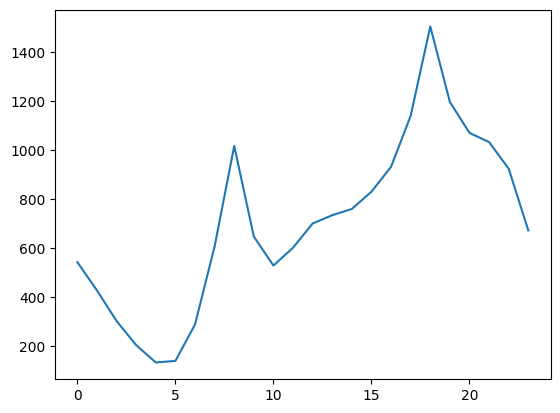

In [73]:
plt.plot(data.groupby(["Hour"])["Rented Bike Count"].mean())

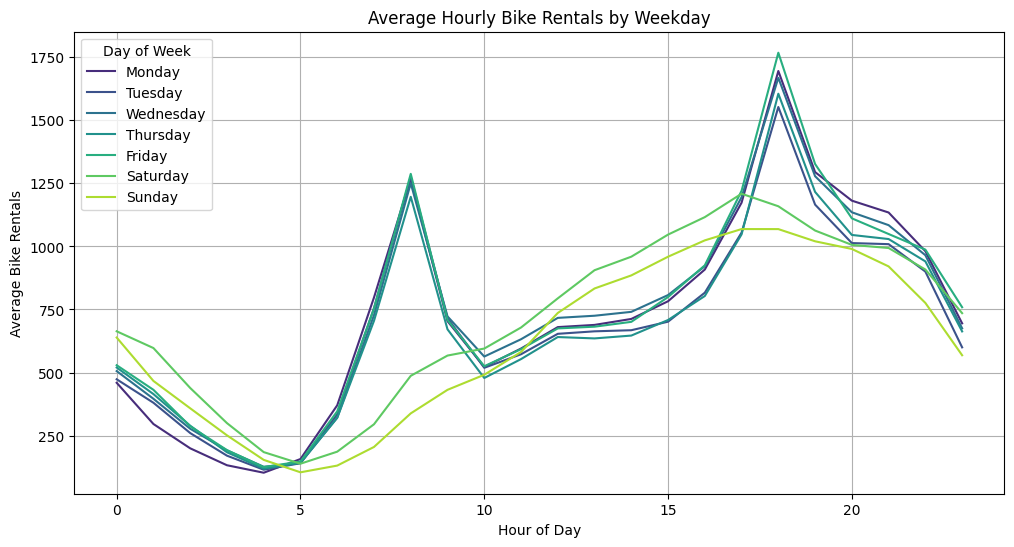

In [74]:


def plot_hourly_weekday_bikes(df):
    df = df.copy()

    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
    df["Weekday"] = df["Date"].dt.day_name()

    grouped = df.groupby(["Weekday", "Hour"])["Rented Bike Count"].mean().reset_index()

    week_days= [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    grouped["Weekday"] = pd.Categorical(
        grouped["Weekday"], categories=week_days, ordered=True
    )
    grouped = grouped.sort_values("Weekday")

    plt.figure(figsize=(12, 6))
    sns.lineplot(
        data=grouped, x="Hour", y="Rented Bike Count", hue="Weekday", palette="viridis"
    )
    plt.title("Average Hourly Bike Rentals by Weekday")
    plt.xlabel("Hour of Day")
    plt.ylabel("Average Bike Rentals")
    plt.legend(title="Day of Week")
    plt.grid(True)
    plt.show()
plot_hourly_weekday_bikes(data)

По будням есть час-пики

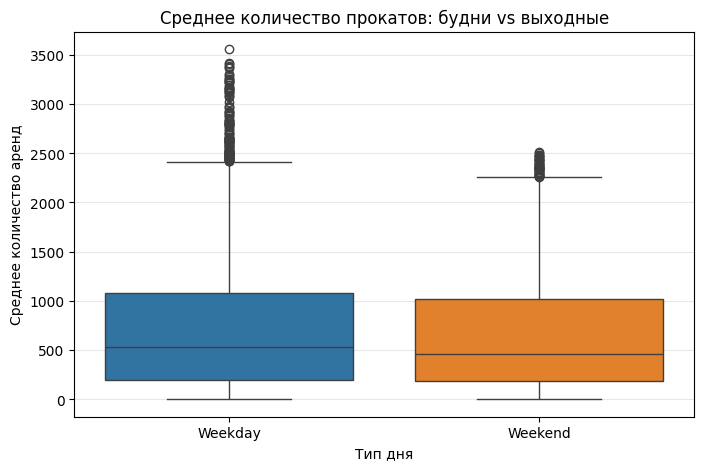

Средние значения:
  Weekday_Type  Rented Bike Count
0      Weekday         719.448914
1      Weekend         667.342147

Разница: 7.8%


In [75]:

def compare_weekday_weekend_rentals(df ):
    df = df.copy()

    df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

    df["Weekday_Type"] = df["Date"].dt.dayofweek.apply(
        lambda x: "Weekday" if x < 5 else "Weekend"
    )

    grouped = df.groupby("Weekday_Type")["Rented Bike Count"].mean().reset_index()


    plt.figure(figsize=(8, 5))
    sns.boxplot(
        data=pd.DataFrame({"Weekday":df[df["Weekday_Type"] == "Weekday"]["Rented Bike Count"],
        "Weekend":df[df["Weekday_Type"] == "Weekend"]["Rented Bike Count"]}),
        palette=["#1f77b4", "#ff7f0e"],
    )
    plt.title("Среднее количество прокатов: будни vs выходные")
    plt.xlabel("Тип дня")
    plt.ylabel("Среднее количество аренд")

    # for index, row in grouped.iterrows():
    #     plt.text(
    #         index,
    #         row["Rented Bike Count"] / 2,
    #         f"{row['Rented Bike Count']:.1f}",
    #         ha="center",
    #         va="center",
    #         color="white",
    #         fontsize=12,
    #         fontweight="bold",
    #     )

    plt.grid(axis="y", alpha=0.3)
    plt.show()

    weekday_mean = grouped.loc[
        grouped["Weekday_Type"] == "Weekday", "Rented Bike Count"
    ].values[0]
    weekend_mean = grouped.loc[
        grouped["Weekday_Type"] == "Weekend", "Rented Bike Count"
    ].values[0]
    difference_pct = ((weekday_mean - weekend_mean) / weekend_mean) * 100

    return grouped, difference_pct

avg_rentals, difference = compare_weekday_weekend_rentals(data)

print("Средние значения:")
print(avg_rentals)
print(f"\nРазница: {difference:.1f}%")


# 2. Обогащение и соединение данных
## 2.1 Интеграция нескольких источников

In [76]:
rentals_data = pd.read_csv('data/synthetic_rentals.csv')
stations_data = pd.read_csv('data/synthetic_stations.csv')
users_data = pd.read_csv('data/synthetic_users.csv')
rentals_data

,rental_id,date,hour,minute,user_id,station_id,duration_minutes
0,R000000,2017-01-01,0,45,U0010,S034,28
1,R000001,2017-01-01,0,17,U0824,S031,31
2,R000002,2017-01-01,0,38,U0954,S035,45
3,R000003,2017-01-01,0,41,U0047,S061,55
4,R000004,2017-01-01,0,25,U0908,S079,21
...,...,...,...,...,...,...,...
39700,R039700,2017-01-31,0,52,U0450,S028,43
39701,R039701,2017-01-31,0,58,U0335,S098,47
39702,R039702,2017-01-31,0,0,U0628,S040,52
39703,R039703,2017-01-31,0,13,U0220,S078,34


In [77]:
stations_data

,station_id,station_name,district,latitude,longitude,location_type,capacity,peak_hours,peak_days,usage_intensity
0,S001,Dongdaemun Station 6,Dongdaemun,37.667576,127.081480,mixed,23,"8,9,12,13,17,18,19",all,0.68
1,S002,Mapo Station 8,Mapo,37.588224,127.095523,mixed,30,"8,9,12,13,17,18,19",all,0.52
2,S003,Dongdaemun Station 8,Dongdaemun,37.673043,126.849501,mixed,39,"8,9,12,13,17,18,19",all,0.60
3,S004,Yeongdeungpo Station 6,Yeongdeungpo,37.696972,127.088342,mixed,22,"8,9,12,13,17,18,19",all,0.49
4,S005,Gangnam Station 10,Gangnam,37.628139,127.158919,business,49,"8,9,17,18,19",weekday,0.99
...,...,...,...,...,...,...,...,...,...,...
95,S096,Yeongdeungpo Station 7,Yeongdeungpo,37.425160,126.787347,transit,41,"7,8,9,17,18,19,20",weekday,0.83
96,S097,Yeongdeungpo Station 8,Yeongdeungpo,37.541027,126.972943,mixed,17,"8,9,12,13,17,18,19",all,0.44
97,S098,Yongsan Station 8,Yongsan,37.655234,126.864140,mixed,34,"8,9,12,13,17,18,19",all,0.42
98,S099,Seodaemun Station 1,Seodaemun,37.529802,126.918407,transit,31,"7,8,9,17,18,19,20",weekday,0.89


In [78]:
users_data

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4
1,U0002,rare,2022-04-28,"7,8,9",weekday,2
2,U0003,rare,2023-09-22,"7,8,9",weekend,3
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32
...,...,...,...,...,...,...
995,U0996,frequent,2022-09-08,"7,8,9,17,18,19",weekday,15
996,U0997,rare,2024-05-24,"7,8,9",all,3
997,U0998,frequent,2022-04-05,"7,8,9,17,18,19",weekday,31
998,U0999,rare,2023-08-31,"16,17,18,19,20",all,1


In [79]:
rentals_data.groupby(['date', 'hour'])['user_id'].count()

date        hour
2017-01-01  0       58
            1       80
            2       10
            3       54
            4       67
                    ..
2017-01-30  20      33
            21      88
            22      90
            23      14
2017-01-31  0       25
Name: user_id, Length: 721, dtype: int64

## 2.2 Работа с пропущенными данными

In [80]:
# find locs with nulls - empty
print(rentals_data[rentals_data.isnull().any(axis = 1)].index)
print(stations_data[stations_data.isnull().any(axis=1)].index)
print(users_data[users_data.isnull().any(axis=1)].index)

Index([], dtype='int64')
Index([], dtype='int64')
Index([], dtype='int64')


# 3. Нестандартная аналитика и пользовательские метрики
## 3.1 Анализ поведения клиентов (сегментация)

In [81]:
# add count_of_rental for users
users_data = users_data.join(rentals_data.groupby('user_id')['rental_id'].count(), on='user_id', how='outer').rename(columns={'rental_id' : 'count_of_rental'})
users_data

,user_id,user_type,registration_date,preferred_hours,preferred_days,avg_rentals_per_month,count_of_rental
0,U0001,periodic,2022-10-22,"10,11,12,13,14,15,16",weekday,4,43
1,U0002,rare,2022-04-28,"7,8,9",weekday,2,38
2,U0003,rare,2023-09-22,"7,8,9",weekend,3,45
3,U0004,periodic,2023-07-22,"7,8,17,18,19",weekend,7,37
4,U0005,frequent,2023-06-08,"7,8,9,12,13,17,18,19",weekday,32,48
...,...,...,...,...,...,...,...
995,U0996,frequent,2022-09-08,"7,8,9,17,18,19",weekday,15,45
996,U0997,rare,2024-05-24,"7,8,9",all,3,39
997,U0998,frequent,2022-04-05,"7,8,9,17,18,19",weekday,31,58
998,U0999,rare,2023-08-31,"16,17,18,19,20",all,1,35


Text(0.5, 1.0, 'Density histogram of count of rental')

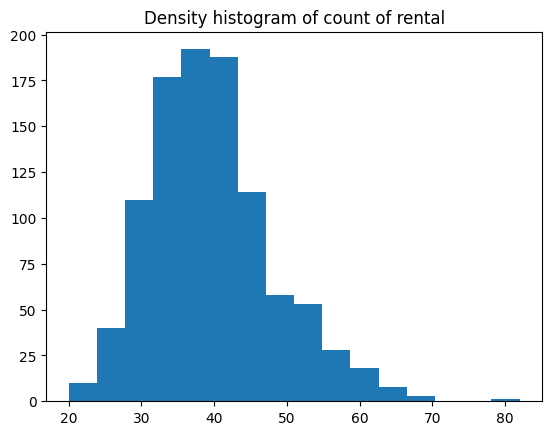

In [82]:
# show hist count of rental
plt.hist(users_data['count_of_rental'], bins=16 )
plt.title('Density histogram of count of rental')

In [83]:
# count of users type
users_data.groupby('user_type').agg({'user_id': 'count', 'avg_rentals_per_month':'mean', 'count_of_rental':'mean'})


,user_id,avg_rentals_per_month,count_of_rental
user_type,,,
frequent,225,25.835556,49.920000
periodic,487,7.987680,37.778234
rare,288,2.531250,34.982639


## 3.2 Влияние внешних факторов

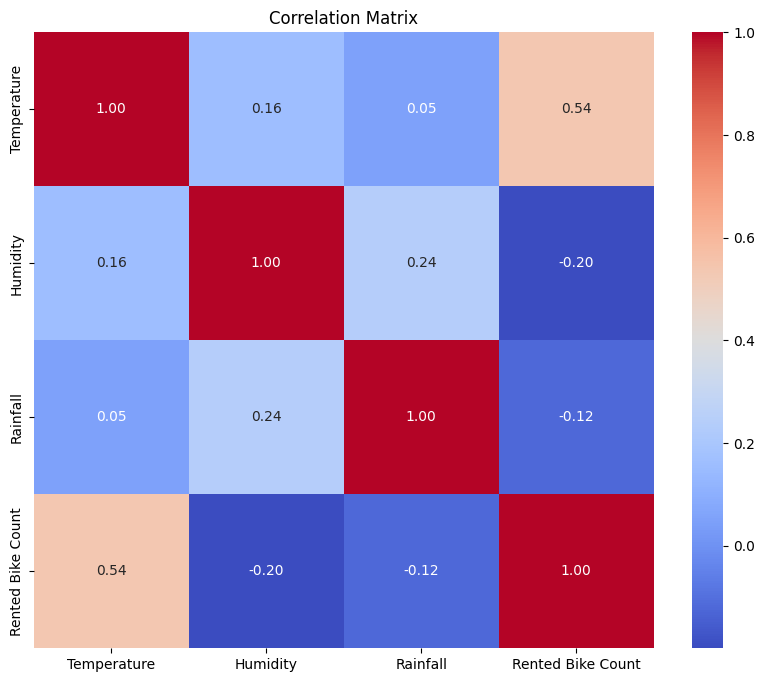

In [84]:
# Correlation analysis
numeric_cols = ["Temperature", "Humidity", "Rainfall", "Rented Bike Count"]
corr_matrix = data[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# high correlation with temperature 

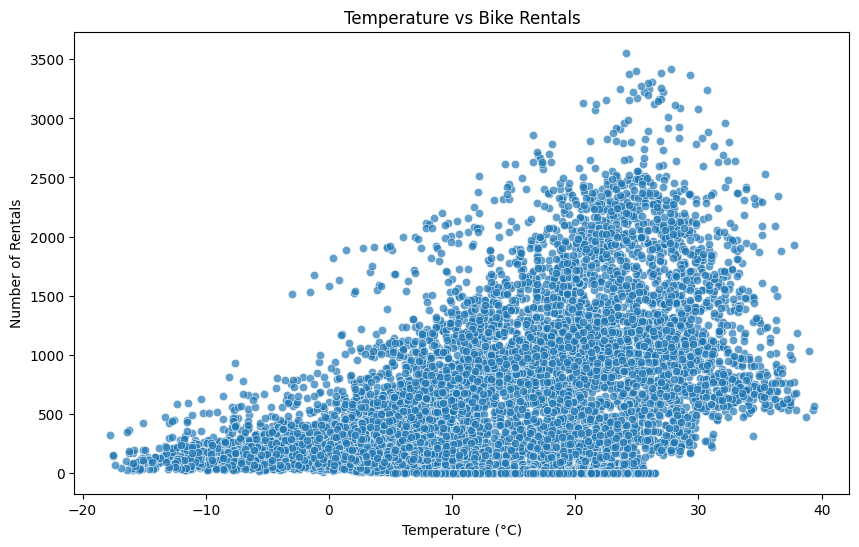

In [85]:
# Scatter plot: Temperature vs Rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Temperature", y="Rented Bike Count", data=data, alpha=0.7)
plt.title("Temperature vs Bike Rentals")
plt.xlabel("Temperature (°C)")
plt.ylabel("Number of Rentals")
plt.show()


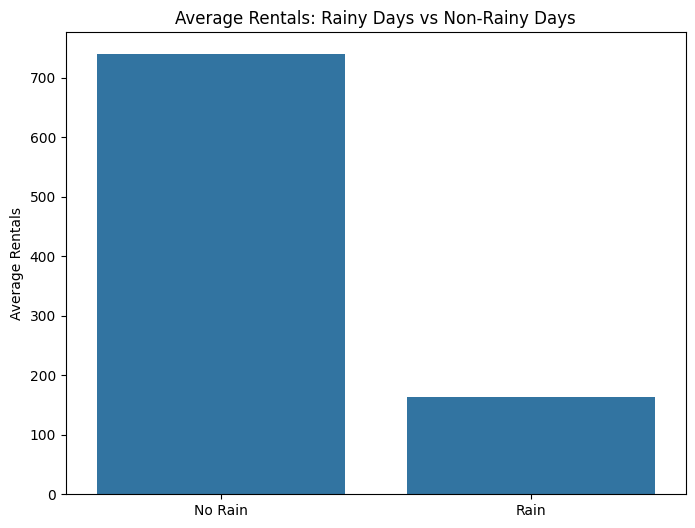

In [86]:
# Compare rainy vs non-rainy days
data["Rainy_Day"] = data["Rainfall"] > 0
rain_compare = data.groupby("Rainy_Day")["Rented Bike Count"].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(x="Rainy_Day", y="Rented Bike Count", data=rain_compare)
plt.title("Average Rentals: Rainy Days vs Non-Rainy Days")
plt.xticks([0, 1], ["No Rain", "Rain"])
plt.xlabel("")
plt.ylabel("Average Rentals")
plt.show()


/tmp/ipykernel_70689/1246216290.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_compare = data.groupby("Temp_Category")["Rented Bike Count"].mean().reset_index()


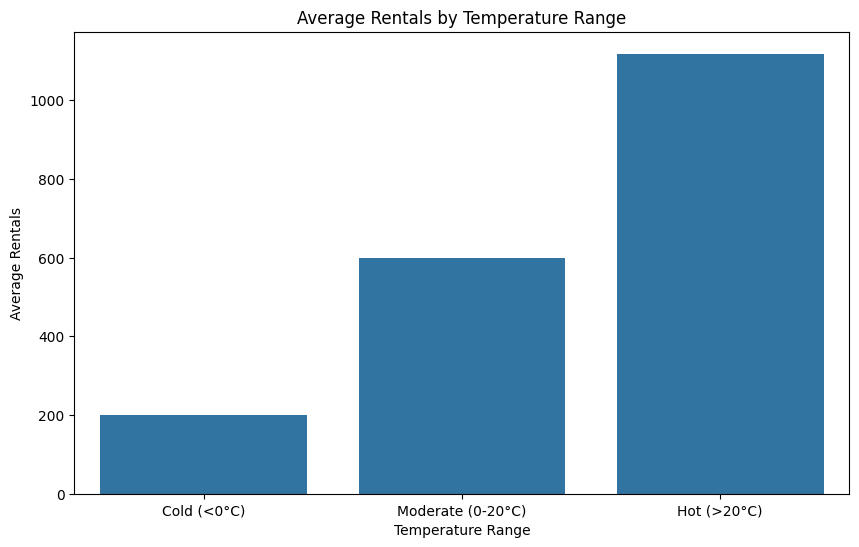

In [87]:
# Temperature range analysis
bins = [-np.inf, 0, 20, np.inf]
labels = ["Cold (<0°C)", "Moderate (0-20°C)", "Hot (>20°C)"]
data["Temp_Category"] = pd.cut(data["Temperature"], bins=bins, labels=labels)
temp_compare = data.groupby("Temp_Category")["Rented Bike Count"].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="Temp_Category", y="Rented Bike Count", data=temp_compare, order=labels)
plt.title("Average Rentals by Temperature Range")
plt.xlabel("Temperature Range")
plt.ylabel("Average Rentals")
plt.show()


In [88]:
# Temperature threshold analysis
threshold = 0
data["Below_Zero"] = data["Temperature"] < threshold
zero_compare = data.groupby("Below_Zero")["Rented Bike Count"].mean()
print(f"\nAverage rentals when temperature is below 0°C:\n{zero_compare}")



Average rentals when temperature is below 0°C:
Below_Zero
False    803.684045
True     197.990928
Name: Rented Bike Count, dtype: float64


## 3.3 Пользовательские метрики и прогнозирование

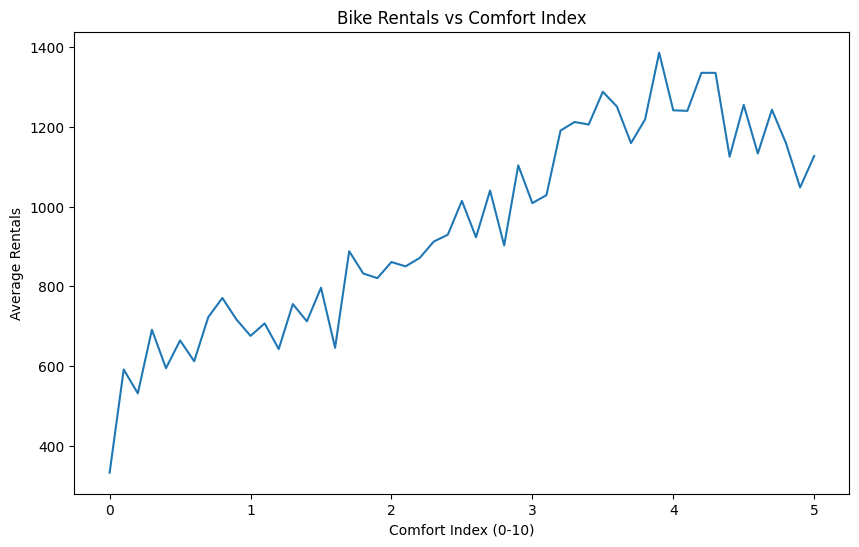


Regression Model Performance:
R² Score: 0.33
MAE: 389.8 rentals

Coefficients:
Temperature: 29.5
Rainfall: -84.0
Solar Radiation: 10.1
Wind speed: 83.1

Comfort Index Correlation: 0.53


In [ ]:
def calculate_comfort_index(temp, rainfall, solar_rad, wind_speed):
    temp_score = np.clip(
        5 * ((temp - 10) / 20), 
        0,
        5,
    )

    rain_penalty = np.clip(rainfall * 0.4, 0, 2)

    solar_bonus = np.clip(solar_rad / 500, 0, 2)

    wind_penalty = np.clip((wind_speed - 5) * 0.2, 0, 1)

    comfort_score = temp_score + solar_bonus - rain_penalty - wind_penalty
    return np.clip(round(comfort_score, 1), 0, 10)


data['Comfort_Index'] = data.apply(
    lambda x: calculate_comfort_index(
        x['Temperature'],
        x['Rainfall'],
        x['Solar Radiation'],
        x['Wind speed']
    ),
    axis=1
)


plt.figure(figsize=(10, 6))
sns.lineplot(
    x="Comfort_Index", y="Rented Bike Count", data=data, estimator="mean", errorbar=None
)
plt.title("Bike Rentals vs Comfort Index")
plt.xlabel("Comfort Index (0-10)")
plt.ylabel("Average Rentals")
plt.show()

# 2. Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

X = data[["Temperature", "Rainfall", 'Solar Radiation', 'Wind speed']]
y = data["Rented Bike Count"]

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

print(f"\nRegression Model Performance:")
print(f"R² Score: {r2_score(y, y_pred):.2f}")
print(f"MAE: {mean_absolute_error(y, y_pred):.1f} rentals")
print("\nCoefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.1f}")

# 4. Model Interpretation
comfort_corr = data["Comfort_Index"].corr(data["Rented Bike Count"])
print(f"\nComfort Index Correlation: {comfort_corr:.2f}")


### интерпритация
- Индекс конфортности не отрожает всю кортину, не особо полезен и точен
- Модель линейной регрессии не очень хорошо справляется с прогнозами
